# Aprendizado Supervisionado - Classificação

Já exploramos sobre como criar, melhorar e interpretar modelos em que a variável resposta é um valor contínuo. Como podemos tratar os problemas em que as respostas não são contínuas?

Vamos trabalhar usando um dataset do kaggle: https://www.kaggle.com/shrutimechlearn/churn-modelling

In [1]:
import pandas as pd
import numpy as np
from IPython.display import Image

In [2]:
df = pd.read_csv('../data/churn/Churn_Modelling.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


Nesse dataset, temos a variável resposta: <b> Exited </b> e algumas colunas que com informações sobre o cliente. Queremos predizer se o cliente vai sair (churn) ou não, em função dessas informações.

<AxesSubplot:>

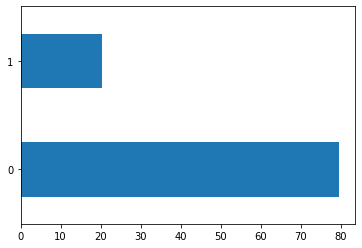

In [4]:
(100*df['Exited'].value_counts()/df['Exited'].shape[0]).plot.barh()

- 0: não houve churn
- 1: houve churn

E se fizermos uma regressão linear?

Vamos tentar criar um modelo do Churn em função da variável Age

In [5]:
df = df.sort_values(by='Exited') #para auxiliar na visualização

In [6]:
features = ['Age']
output = 'Exited'

array([[<AxesSubplot:title={'center':'Age'}>]], dtype=object)

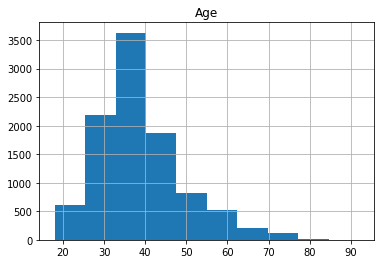

In [7]:
df[features].hist()

In [8]:
from sklearn.linear_model import LinearRegression

In [9]:
modelo = LinearRegression()

In [10]:
modelo.fit(X=df[features], y=df[output])

LinearRegression()

In [11]:
df['ypred'] = modelo.predict(df[features])

In [12]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Y vs X')

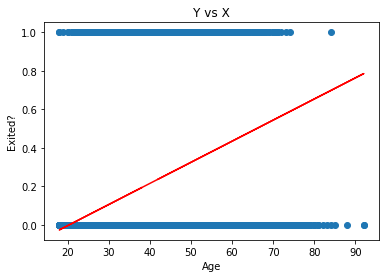

In [13]:
plt.scatter(df[features], df[output])
plt.plot(df[features], df['ypred'], color='red')
plt.ylabel('Exited?')
plt.xlabel('Age')
plt.title('Y vs X')

Fazer uma regressão linear não gera nenhum erro no código..no entanto apresenta alguns problemas..

- resposta só possui 2 valores possiveis: 0 (não churn) ou 1 (churn). Ypredito é uma reta
- conforme a idade aumenta ou diminui, os valores de ypred irão extrapolar os limites da variável resposta

In [14]:
df['residuo'] = df['ypred'] - df[output]

In [15]:
import seaborn as sns

Lembre-se que uma regressão linear tem como premissa que seus resíduos sejam normalmente distribuidos em torno de 0:

Text(0.5, 1.0, 'Histograma dos resíduos')

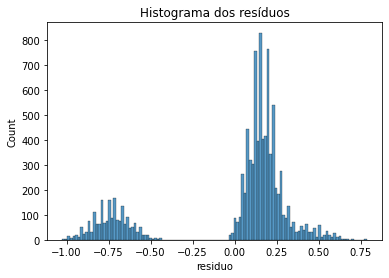

In [16]:
hist = sns.histplot(df['residuo'])
plt.title("Histograma dos resíduos")

## Mas então, como modelar uma resposta categórica?

Se optarmos por utilizar um modelo linear, podemos trabalhar com uma generalização da regressão (GLM) chamada <b>  <font color='green'> regressão logística </font> </b> :  

In [17]:
from sklearn.linear_model import LogisticRegression

Esse modelo é dado por:

\begin{align}
log(\frac{p}{1-p}) = b0 + b1*x1 + b2*x2 + ...
\end{align}

A parte esquerda da equação é chamada <b> Logit </b>. Nesse tipo de modelo, a premissa é que <b> Logit(p) tenha uma relação linear com as variáveis preditoras </b>. Rearranjando:

\begin{align}
p = \frac{1}{1+e^{-(b0 + b1*x1+b2*x2 +...)}}
\end{align}

Essa função é conhecida como Sigmoide, e tem esse formato abaixo:

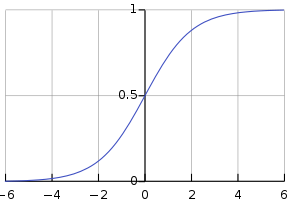

In [18]:
Image('../figures/sigmoid.png')

In [19]:
modelo_logistico = LogisticRegression()

In [20]:
modelo_logistico.fit(X=df[features], y=df[output])

LogisticRegression()

Modelos de classificação tem duas formas de predict:

In [21]:
modelo_logistico.predict_proba(df[features])

array([[0.82298419, 0.17701581],
       [0.89121363, 0.10878637],
       [0.8319684 , 0.1680316 ],
       ...,
       [0.58437345, 0.41562655],
       [0.76115662, 0.23884338],
       [0.78328612, 0.21671388]])

In [22]:
modelo_logistico.predict_proba(df[features])[:,1]

array([0.17701581, 0.10878637, 0.1680316 , ..., 0.41562655, 0.23884338,
       0.21671388])

In [23]:
df['ypred_log'] = modelo_logistico.predict_proba(df[features])[:,1] #predizendo a probabilidade do output ser 1

Text(0.5, 1.0, 'Y vs X')

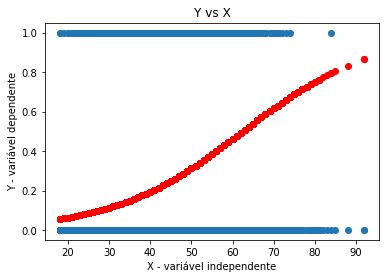

In [24]:
plt.scatter(df[features], df[output])
plt.scatter(df[features], df['ypred_log'], color='red')
plt.ylabel('Y - variável dependente')
plt.xlabel('X - variável independente')
plt.title('Y vs X')

A transformação que aplicamos (função logística) tem esse efeito de restringir a saida entre 0 e 1, então a predição pode ser dada como uma probabilidade de a classe ser 1. Se adotarmos um limiar, ex.: 50%, podemos atribuir 1 para os valores cuja probabilidade é maior que o limiar, ou zero para o outro caso.

Como um modelo linear generalizado, a regressão logística também deve respeitar premissas. Caso elas não sejam atendidas, os coeficientes e as métricas podem estar incorretos. 

- variável resposta é binária (se tiver mais de 2 categorias, necessário usar outro GLM como regressão multinomial)
- observações são independentes umas das outras
- as variáveis explanatórias não são colineares (correlacionadas)
- não há outliers
- há uma relação linear entre as variáveis explanatorias e o logit da variável resposta

Para saber mais: https://www.statology.org/assumptions-of-logistic-regression/

# Ensemble de árvores para classificação

Os modelos baseados em árvores de decisão também são robustos para fazer classificação. A diferença aqui é que, para modelos baseados em Bagging, cada árvore "dá o seu voto", a classe final ou propabilidade é a proporção de votos no ensemble (conjunto de modelos).

Para modelos baseados em Boosting, como o que vamos testar agora, a probabilidade da variável resposta ser 0 ou 1 é aproximada por sucessivas predições de árvores de decisão com objetivo de minimizar o residuo da árvore anterior.  

In [25]:
df = pd.read_csv('../data/churn/Churn_Modelling.csv')

Os modelos que utilzamos na seção anterior também podem ser adaptados para utilizar em casos de classificação

In [26]:
!pip install xgboost #instalar caso ainda não tenha instalado

Invalid requirement: '#instalar'

You are using pip version 19.0.3, however version 21.1.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [27]:
from xgboost.sklearn import XGBClassifier

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [29]:
import os
import sys
sys.path.append('../')
from src.utils import *

Ja aplicamos uma função para transformar cada categoria em um número. Dessa vez vamos testar outra opção: one hot encoding

Processamento para variáveis não numéricas:

In [30]:
def fazer_onehotencoding_colunas_categoricas(
    df: pd.DataFrame, 
    drop: bool = True, 
    max_cats: int = 10,
    subset: list = []
) -> pd.DataFrame:
    
    """
    recebe um dataframe, identifica as colunas não numericas e faz one hot encoding de cada
    
    Parameters:
    -----------
    
    df: dataframe a ser processado
    drop: eliminar as colunas originais
    max_cats: maximo de valores únicos na coluna, que se tornarao em categorias distintas. 
    Se a coluna tiver mais que o máximo, retorna ela sem transformar
    subset: aplicar a transformação em somente um conjunto de colunas
    
    Returns:
    --------
    dataframe com as colunas categoricas tratadas utilizando one hot encoding
    
    """
        
    for nome, c in df.items():
        if is_string_dtype(c) and c.nunique() <= max_cats: 
            dummified_col =  pd.get_dummies(c)
            dummified_col.columns = [f"{nome}_is{x}" for x in dummified_col.columns]
            df = df.join(dummified_col)
            
            if drop: 
                df = df.drop(nome, axis = 1)

    return df
            

In [31]:
df = fazer_onehotencoding_colunas_categoricas(df)

In [32]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_isFrance,Geography_isGermany,Geography_isSpain,Gender_isFemale,Gender_isMale
0,1,15634602,Hargrave,619,42,2,0.00,1,1,1,101348.88,1,1,0,0,1,0
1,2,15647311,Hill,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1,1,0
2,3,15619304,Onio,502,42,8,159660.80,3,1,0,113931.57,1,1,0,0,1,0
3,4,15701354,Boni,699,39,1,0.00,2,0,0,93826.63,0,1,0,0,1,0
4,5,15737888,Mitchell,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1,1,0


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   RowNumber            10000 non-null  int64  
 1   CustomerId           10000 non-null  int64  
 2   Surname              10000 non-null  object 
 3   CreditScore          10000 non-null  int64  
 4   Age                  10000 non-null  int64  
 5   Tenure               10000 non-null  int64  
 6   Balance              10000 non-null  float64
 7   NumOfProducts        10000 non-null  int64  
 8   HasCrCard            10000 non-null  int64  
 9   IsActiveMember       10000 non-null  int64  
 10  EstimatedSalary      10000 non-null  float64
 11  Exited               10000 non-null  int64  
 12  Geography_isFrance   10000 non-null  uint8  
 13  Geography_isGermany  10000 non-null  uint8  
 14  Geography_isSpain    10000 non-null  uint8  
 15  Gender_isFemale      10000 non-null  

In [34]:
df['Surname'].unique().tolist()

['Hargrave',
 'Hill',
 'Onio',
 'Boni',
 'Mitchell',
 'Chu',
 'Bartlett',
 'Obinna',
 'He',
 'H?',
 'Bearce',
 'Andrews',
 'Kay',
 'Chin',
 'Scott',
 'Goforth',
 'Romeo',
 'Henderson',
 'Muldrow',
 'Hao',
 'McDonald',
 'Dellucci',
 'Gerasimov',
 'Mosman',
 'Yen',
 'Maclean',
 'Young',
 'Nebechi',
 'McWilliams',
 'Lucciano',
 'Azikiwe',
 'Odinakachukwu',
 'Sanderson',
 'Maggard',
 'Clements',
 'Lombardo',
 'Watson',
 'Lorenzo',
 'Armstrong',
 'Cameron',
 'Hsiao',
 'Clarke',
 'Osborne',
 'Lavine',
 'Bianchi',
 'Tyler',
 'Martin',
 'Okagbue',
 'Yin',
 'Buccho',
 'Chidiebele',
 'Trevisani',
 "O'Brien",
 'Parkhill',
 'Yoo',
 'Phillipps',
 'Tsao',
 'Endrizzi',
 "T'ien",
 'Velazquez',
 'Hunter',
 'Clark',
 'Jeffrey',
 'Pirozzi',
 'Jackson',
 'Hammond',
 'Brownless',
 'Chibugo',
 'Glauert',
 'Pisano',
 'Konovalova',
 'McKee',
 'Palermo',
 'Ballard',
 'Wallace',
 'Cavenagh',
 'Hu',
 'Read',
 'Bushell',
 'Postle',
 'Buley',
 'Leonard',
 'Mills',
 'Onyeorulu',
 'Beit',
 'Ndukaku',
 'Gant',
 'Rowl

Para as variáveis que possuiam mais de 10 categorias, podemos fazer um encoding ordinal para nao criar muitas colunas. Vamos usar a mesma função de processamento já utilizada na regressão:

In [35]:
train_cats(df)
for n,c in df.items():
    numericalize(df,c,n)

<b> Para pensar </b>: a única variável que transformamos aqui era o Sobrenome (Surname). Será que ela nos traz algum poder preditivo?

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   RowNumber            10000 non-null  int64  
 1   CustomerId           10000 non-null  int64  
 2   Surname              10000 non-null  int16  
 3   CreditScore          10000 non-null  int64  
 4   Age                  10000 non-null  int64  
 5   Tenure               10000 non-null  int64  
 6   Balance              10000 non-null  float64
 7   NumOfProducts        10000 non-null  int64  
 8   HasCrCard            10000 non-null  int64  
 9   IsActiveMember       10000 non-null  int64  
 10  EstimatedSalary      10000 non-null  float64
 11  Exited               10000 non-null  int64  
 12  Geography_isFrance   10000 non-null  uint8  
 13  Geography_isGermany  10000 non-null  uint8  
 14  Geography_isSpain    10000 non-null  uint8  
 15  Gender_isFemale      10000 non-null  

In [37]:
output = 'Exited'
features = [x for x in df.columns if x!= output]

In [38]:
features

['RowNumber',
 'CustomerId',
 'Surname',
 'CreditScore',
 'Age',
 'Tenure',
 'Balance',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'EstimatedSalary',
 'Geography_isFrance',
 'Geography_isGermany',
 'Geography_isSpain',
 'Gender_isFemale',
 'Gender_isMale']

In [39]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_isFrance,Geography_isGermany,Geography_isSpain,Gender_isFemale,Gender_isMale
0,1,15634602,1116,619,42,2,0.00,1,1,1,101348.88,1,1,0,0,1,0
1,2,15647311,1178,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1,1,0
2,3,15619304,2041,502,42,8,159660.80,3,1,0,113931.57,1,1,0,0,1,0
3,4,15701354,290,699,39,1,0.00,2,0,0,93826.63,0,1,0,0,1,0
4,5,15737888,1823,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1,1,0


Ja sabemos que não podemos avaliar o modelo com os mesmos dados que eles foram treinados:

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
train, validation = train_test_split(
    df, 
    test_size=0.20, 
    shuffle=True, #aqui aparentemente não existe um componente temporal, entao vamos amostrar aleatoriamente
    stratify=df[output],  #vamos amostrar um validation set que tenha a mesma proporção de churn que o treino
    random_state=42
)

Note 2 pontos aqui:

- estamos colocando shuffle = True para amostrar de forma aleatória os dados de treino e teste. Nesse exemplo não temos um componente temporal explicito então podemos testar a validação dessa forma

- estamos mantendo a mesma proporção entre 0 e 1s da variável Exited nos conjuntos de treinamento e validação

In [42]:
round(100*train[output].value_counts()/train[output].shape[0],2)

0    79.62
1    20.38
Name: Exited, dtype: float64

In [43]:
round(100*validation[output].value_counts()/validation[output].shape[0],2)

0    79.65
1    20.35
Name: Exited, dtype: float64

In [44]:
modelo = XGBClassifier(random_state=10)

In [45]:
modelo.fit(X=train[features], y = train[output])

c:\users\rbarella\onedrive - suzano papel e celulose s a\repos\treinamento\my-env\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:36:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=10,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

## Entendendo o desempenho do modelo

Na regressão, podemos investigar o residuo do modelo, isso é, valores preditos - valores reais. A partir do residuo extraimos diversos indicadores de desempenho. Como isso funciona num modelo que só possui 2 possiveis respostas reais?

Vamos começar gerando as predições no conjunto de validação:

In [124]:
validation.loc[:, 'ypred'] = modelo.predict(validation[features])

c:\users\rbarella\onedrive - suzano papel e celulose s a\repos\treinamento\my-env\lib\site-packages\pandas\core\indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
c:\users\rbarella\onedrive - suzano papel e celulose s a\repos\treinamento\my-env\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [125]:
#threshold = 0.33

In [126]:
#validation.loc[:,'ypred'] = (modelo.predict_proba(validation[features])[:,1] >= threshold).astype(int)

Temos duas classes e duas possiveis classificações:

In [127]:
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix

In [128]:
print(confusion_matrix(validation[output], validation['ypred']))

[[1510   83]
 [ 216  191]]


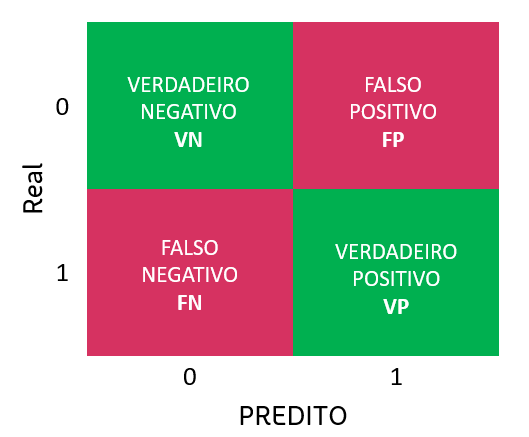

In [129]:
Image('../figures/confusion_matrix.png')

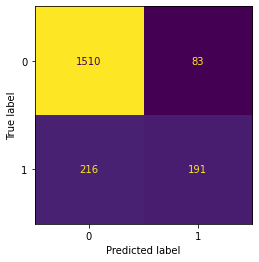

In [130]:
plot_confusion_matrix(modelo, validation[features], validation[output], colorbar=False)

Daqui, podemos tirar algumas métricas:

- <b> Acurácia </b>: qual a proporção das predições corretas?

\begin{align}
Acurácia = \frac{VN+VP}{VN+VP+FN+FP} = \frac{Predições Corretas}{PrediçõesTotais}
\end{align}

In [131]:
(1511+199)/(1511+199+208+82)

0.855

A acurácia costuma ser um indicador padrão para ajustar hiperparâmetros ou comparar modelos. No entanto, pode não ser a melhor escolha quando as classes estão desbalanceadas. 

Vamos considerar um exemplo extremo, mas real: detecção de fraudes em cartão de crédito em que também temos 10mil observações, 100 delas em que houve fraude, e 9900 em que não houve. Considere que o classificador gerou a seguinte matriz de confusão:

<AxesSubplot:>

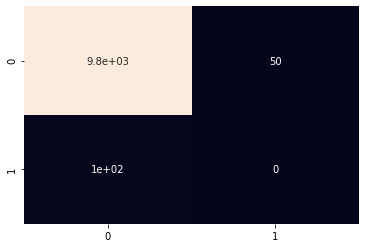

In [132]:
sns.heatmap([[9850, 50], [100, 0]], annot = True , cbar=False)

Acurácia nesse caso é de:

In [133]:
(9850 + 0)/ (9850 + 0 + 50 + 100)

0.985

<b> Wow.. 98.5% de acurácia </b> ... <font color='red'> mas o modelo pegou alguma fraude? </font>

A acurácia será sempre enviesada pela classe majoritária!

Então como podemos caracterizar o desempenho do modelo?

- <b> Precisão </b>: Qual a proporção <font color='red'> predita </font> na classe x (0 ou 1) estava correta?

\begin{align}
Precisão = \frac{VP}{VP+FP} = \frac{Predições Corretas}{PrediçõesClasseX}
\end{align}

Precisão classe 1:

In [134]:
184/(184+93)

0.6642599277978339

- Recall/Sensitividade: Qual proporção <font color='red'> medida </font> na classe x estava correta?

\begin{align}
Recall = \frac{VP}{VP+FN} = \frac{PrediçõesCorretas}{MedidoClasseX}
\end{align}

https://developers.google.com/machine-learning/crash-course/classification/precision-and-recall

Recall classe 1:

In [135]:
184/(184+223)

0.4520884520884521

- Especificidade: Recall da classe 0, ou qual proporção classificada na classe 0 era realmente classe 0?

\begin{align}
Especificidade = \frac{VN}{VN+FP} = \frac{PrediçõesNegativasCorretas}{TotalDeNegativos}
\end{align}

In [136]:
(1500)/(1500+93)

0.9416195856873822

<b> F1-Score </b>: é um indicador composto, calculado a partir da média harmônica entre precisão e recall: 

\begin{align}
f1score = 2*\frac{precisao*recall}{precisao+recall}
\end{align}

### Mas para que tanto indicador?

Para diferentes problemas de classificação, podemos estar interessados em obter um modelo que maximiza diferentes métricas:

- Num modelo que classifica se o paciente tem ou não tem câncer, é mais custoso um Falso Positivo (paciente saudável classificado com câncer) ou um Falso Negativo (paciente com câncer classificado como saudável)? Qual a métrica a ser otimizada?


- Num modelo que classifica se a folha da máquina de papel está prestes a quebrar, o que é mais custoso, Falso Positivo ou Falso Negativo?


- Num modelo que classifica um e-mail como spam, o que é mais custoso? Falso positivo ou Falso negativo?


- Para o nosso problema atual (churn), o que é pior? Detectar erroneamente um cliente que não iria sair? não detectar um cliente que vai sair de fato?

<font color='red'> Quanto maior Recall, menor a Precisão, e vice-versa </font>

In [137]:
print(classification_report(validation[output], validation['ypred']))

              precision    recall  f1-score   support

           0       0.87      0.95      0.91      1593
           1       0.70      0.47      0.56       407

    accuracy                           0.85      2000
   macro avg       0.79      0.71      0.74      2000
weighted avg       0.84      0.85      0.84      2000



As precisão e recall dependem do limiar para classificação. Por padrão, o limiar está em 0.5. Ou seja probabilidades > 0.5 são classificadas como 1 ou Churn.

Para avaliar o modelo em vários limiares (thresholds) diferentes, a interpretabilidade das matrizes de confusão ficaria....confusa. Para isso existe a curva ROC

<b> ROC: Receiver Operating Characteristic Curve </b>

In [138]:
from sklearn.metrics import plot_roc_curve

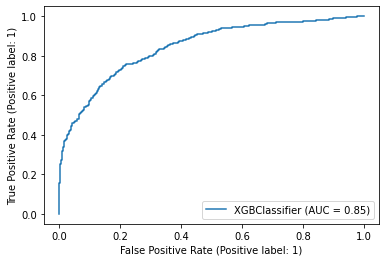

In [139]:
plot_roc_curve(modelo, validation[features], validation[output])  

O threshold varia de 1 (esquerda) até zero (direita). Para cada valor, plotamos:

True Positives Rate:

\begin{align}
TPR = \frac{VP}{VP+FN} = Recall
\end{align}

False Positives Rate:

\begin{align}
FPR = \frac{FP}{VN+FP}=1-Especificidade
\end{align}

O que queremos num bom modelo?! Alta TPR com baixa FPR. Se TPR fosse 1 e FPR zero, o modelo seria perfeito, a curva seria na verdade um quadrado, e a área abaixo desse quadrado seria = 1. <b> Essa área é chamada de AUC  (area under curve) e pode ser útil para comparar diferentes modelos de classificação </b>

- AUC = 1 - Modelo perfeito

- AUC = 0.5 - Modelo não apresenta nenhuma vantagem em relação a uma escolha aleatória

- AUC = 0 - Todas as predições estão incorretas

No entanto, AUC não depende do threshold. Em problemas que precisamos privilegiar o Recall, por, exemplo, maximizar o AUC não vai garantir que o Recall seja maximizado.

## Tunando os hiperparâmetros do modelo

Ja vimos que, dependendo do nosso objetivo e do balanceamento das classes, devemos escolher uma métrica diferente para encontrar um modelo ótimo. A resposta para essa pergunta tipicamente deve estar associada ao problea de negócios a ser resolvido

Vamos fazer uma busca por hiperparâmetros ótimos:

In [140]:
from sklearn.model_selection import RandomizedSearchCV, KFold
from sklearn.metrics import f1_score, precision_score, recall_score, roc_auc_score

In [141]:
parametros_para_testar = {
    'learning_rate': np.arange(0.1, 0.6, 0.05), #quanto cada árvore corrige do residuo da árvore anterior
    'max_depth': np.arange(3, 11, 1), 
    'subsample': [0.5, 0.8, 0.9, 1],
    'colsample_bytree': [0.5, 0.8, 1],
    'scale_pos_weight': [1, 2, 4, 8] #peso da classe minoritária para auxiliar quando temos classes desbalanceadas
}

Mais sobre como ajustar XGBoost para classes desbalanceadas: https://machinelearningmastery.com/xgboost-for-imbalanced-classification/

In [142]:
from sklearn.metrics import SCORERS

In [143]:
grid_search = RandomizedSearchCV(
    estimator=XGBClassifier(), 
    param_distributions=parametros_para_testar,
    n_iter=30,
    scoring= ['f1', 'precision', 'recall', 'roc_auc'], #funções para computar em cada teste.
    refit='f1', #MUITO CUIDADO: você quer escolher o melhor score da classe 1? ou a média das duas classes?
    cv = KFold(n_splits=5),
    n_jobs=-1,
    verbose=10
)

In [144]:
%time grid_search.fit(X=train[features], y=train[output])

Fitting 5 folds for each of 30 candidates, totalling 150 fits


c:\users\rbarella\onedrive - suzano papel e celulose s a\repos\treinamento\my-env\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:02:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Wall time: 1min 14s


RandomizedSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing...
                                           subsample=None, tree_method=None,
                                           validate_parameters=None,
                                           verbosity=None),
                   n_iter=30, n_jobs=-1,
                   p

In [145]:
import pickle

In [146]:
with open('../models/grid_churn.pkl', 'wb') as file:
    pickle.dump(grid_search, file)

In [170]:
with open('../models/grid_churn.pkl', 'rb') as file:
    grid_search = pickle.load(file)

In [148]:
pd.set_option('display.max_columns', None)

In [171]:
grid_search.best_score_

0.6128897767380731

In [173]:
scores = pd.DataFrame(grid_search.cv_results_)

In [174]:
scores.iloc[np.argmax(scores['rank_test_f1']),:]

mean_fit_time                                                       2.95258
std_fit_time                                                       0.052024
mean_score_time                                                    0.029017
std_score_time                                                     0.003466
param_subsample                                                         0.5
param_scale_pos_weight                                                    8
param_max_depth                                                           6
param_learning_rate                                                     0.5
param_colsample_bytree                                                  0.5
params                    {'subsample': 0.5, 'scale_pos_weight': 8, 'max...
split0_test_f1                                                     0.558459
split1_test_f1                                                     0.517829
split2_test_f1                                                     0.506667
split3_test_

In [176]:
grid_search.best_params_

{'subsample': 0.5,
 'scale_pos_weight': 2,
 'max_depth': 3,
 'learning_rate': 0.25000000000000006,
 'colsample_bytree': 0.8}

In [177]:
grid_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.25000000000000006, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=2, subsample=0.5,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [178]:
modelo_tunado = grid_search.best_estimator_

In [179]:
validation.loc[: ,['ypred']] = modelo_tunado.predict(validation[features])

c:\users\rbarella\onedrive - suzano papel e celulose s a\repos\treinamento\my-env\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [180]:
print(classification_report(validation[output], validation['ypred']))

              precision    recall  f1-score   support

           0       0.90      0.90      0.90      1593
           1       0.60      0.60      0.60       407

    accuracy                           0.84      2000
   macro avg       0.75      0.75      0.75      2000
weighted avg       0.84      0.84      0.84      2000



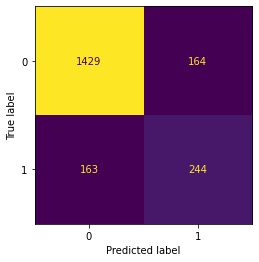

In [155]:
plot_confusion_matrix(modelo_tunado, validation[features], validation[output], colorbar=False)

## Otimizando o modelo para uma regra de negócio

In [156]:
confusion_matrix(validation[output], validation['ypred'])

array([[1429,  164],
       [ 163,  244]], dtype=int64)

In [157]:
from sklearn.metrics import make_scorer, recall_score

In [158]:
def score_custo_churn(
    y_true: pd.Series, 
    y_pred: pd.Series
) -> float:
    
    """
    regra de negócio: 
        - custo de aquisição de um novo cliente: $2500
        - custo de engajamento potenciais clientes que vão sair: $500 (considerando que já se 
        conhecem as ações efetivas, ex. enviar um bonus, cashback, cesta de serviços ampliada, etc..)
        
        
    custo: quanto menor, melhor
    
    """
    
    cm = confusion_matrix(y_true, y_pred)
    
    #extraindo da matriz de confusão
    VN = cm[0][0]
    FP = cm[0][1]
    FN = cm[1][0]
    VP = cm[1][1]
   
    custo_aquisicao_cliente = 2500
    custo_engajamento = 500
    
    custo = 500*(VP + FP) - 2500*(VP)
    
    return custo
    

In [159]:
reducao_custo = score_custo_churn(y_true = validation[output], y_pred = validation['ypred'])

In [160]:
print(f"Baseado nas regras de negocio, o modelo_tunado tem potencial de redução de custo em: US${reducao_custo}")

Baseado nas regras de negocio, o modelo_tunado tem potencial de redução de custo em: US$-406000


In [161]:
churn_scorer = make_scorer(score_custo_churn, greater_is_better=False)

In [162]:
grid_search = RandomizedSearchCV(
    estimator=XGBClassifier(), 
    param_distributions=parametros_para_testar,
    n_iter=30,
    scoring= churn_scorer,
    refit=True, 
    cv = KFold(n_splits=5),
    n_jobs=-1,
    verbose=10
)

In [163]:
%time grid_search.fit(X=train[features], y=train[output])

Fitting 5 folds for each of 30 candidates, totalling 150 fits


c:\users\rbarella\onedrive - suzano papel e celulose s a\repos\treinamento\my-env\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:04:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Wall time: 1min 17s


RandomizedSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing...
                                           validate_parameters=None,
                                           verbosity=None),
                   n_iter=30, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.5, 0.8, 1],
                      

In [164]:
with open('../models/grid_churn_custo_personalizado.pkl', 'wb') as file:
    pickle.dump(grid_search, file)

In [181]:
with open('../models/grid_churn_custo_personalizado.pkl', 'rb') as file:
    grid_search = pickle.load(file)

In [182]:
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_subsample,param_scale_pos_weight,param_max_depth,param_learning_rate,param_colsample_bytree,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,2.087617,0.051225,0.024349,0.012254,0.9,8,4,0.3,0.5,"{'subsample': 0.9, 'scale_pos_weight': 8, 'max...",387500.0,318000.0,288500.0,383000.0,346500.0,344700.0,37876.905893,3
1,5.615655,0.198663,0.020378,0.006620,0.8,8,10,0.45,0.5,"{'subsample': 0.8, 'scale_pos_weight': 8, 'max...",305500.0,287000.0,225000.0,318000.0,298500.0,286800.0,32493.999446,18
2,4.420251,0.247529,0.014151,0.004243,0.8,1,7,0.15,0.8,"{'subsample': 0.8, 'scale_pos_weight': 1, 'max...",291000.0,256500.0,242000.0,315000.0,288500.0,278600.0,26094.827074,27
3,1.770802,0.065778,0.017394,0.003772,1,1,3,0.2,1,"{'subsample': 1, 'scale_pos_weight': 1, 'max_d...",300500.0,277000.0,244500.0,310500.0,302500.0,287000.0,24004.166305,17
4,5.552656,0.063560,0.014134,0.004231,0.5,1,9,0.45,1,"{'subsample': 0.5, 'scale_pos_weight': 1, 'max...",274500.0,249000.0,215500.0,287500.0,260500.0,257400.0,24634.122676,30
5,4.232357,0.451695,0.014119,0.004961,0.8,1,7,0.1,0.5,"{'subsample': 0.8, 'scale_pos_weight': 1, 'max...",301000.0,260000.0,229000.0,289000.0,276500.0,271100.0,25056.735621,29
6,5.806417,0.104760,0.015753,0.004672,0.9,1,7,0.2,1,"{'subsample': 0.9, 'scale_pos_weight': 1, 'max...",298000.0,273000.0,238000.0,301000.0,284500.0,278900.0,22769.277547,25
7,2.936197,0.403458,0.010495,0.000810,0.9,2,4,0.4,1,"{'subsample': 0.9, 'scale_pos_weight': 2, 'max...",335000.0,283500.0,256500.0,339500.0,327000.0,308300.0,32662.822903,11
8,5.625617,0.076996,0.014532,0.003913,0.9,4,9,0.15,0.5,"{'subsample': 0.9, 'scale_pos_weight': 4, 'max...",328500.0,280500.0,245500.0,327500.0,303500.0,297100.0,31270.433320,15
9,1.494783,0.022438,0.012113,0.003121,1,1,3,0.55,1,"{'subsample': 1, 'scale_pos_weight': 1, 'max_d...",312500.0,260500.0,235500.0,319000.0,287000.0,282900.0,31447.416428,21


In [185]:
validation.loc[:,['ypred']] = grid_search.best_estimator_.predict(validation[features])

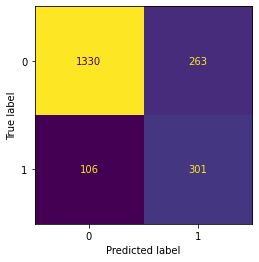

In [186]:
plot_confusion_matrix(grid_search.best_estimator_, validation[features], validation[output], colorbar=False)

In [187]:
nova_reducao_custo = score_custo_churn(y_true = validation[output], y_pred = validation['ypred'])
print(f"Baseado nas regras de negocio, o modelo_tunado tem potencial de redução de custo em: US${nova_reducao_custo}")

Baseado nas regras de negocio, o modelo_tunado tem potencial de redução de custo em: US$-470500


Esse exercicio mostra algumas coisas interessantes:

- nem sempre o modelo de melhor acurácia, precisão, recall vai ser o melhor modelo para o negócio
- com alguns passos extras podemos conectar o machine learning com informações do processo e entregar maior valor agregado
- além disso, o modelo pode ajudar a refinar a regra de negócio, especialmente ajudando a responder a pergunta: <b> <font color='red'> Quais as melhores ações de engajamento? </font> </b> Como? Aplicando os métodos de interpretação do modelo!

# Interpretando o modelo

De forma similar ao que fizemos na regressão, podemos interpretar o modelo de classificação utilizando o shap:

In [188]:
import shap

In [189]:
explainer = shap.Explainer(modelo_tunado)

In [190]:
%time shap_values = explainer(validation[features])

Wall time: 100 ms


ntree_limit is deprecated, use `iteration_range` or model slicing instead.


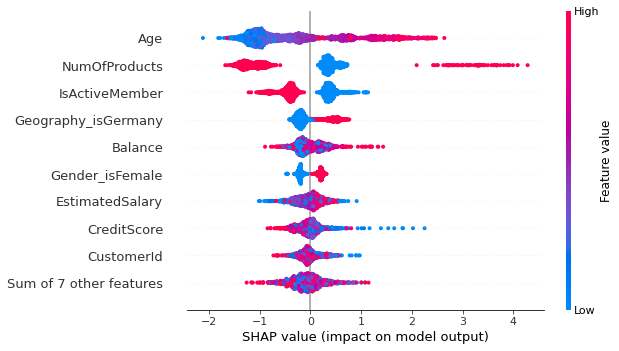

In [191]:
shap.plots.beeswarm(shap_values)

Veja algumas oportunidades de segmentar as ações de engajamento:

- clientes de maior idade
- número de produtos? É possivel que um produto em especial esteja associado à maior taxa de Churn
- Membros menos ativos
- Consumidores da Alemanha
- Mulheres

Podemos também verificar a importância média de cada variável por meio do Shap:

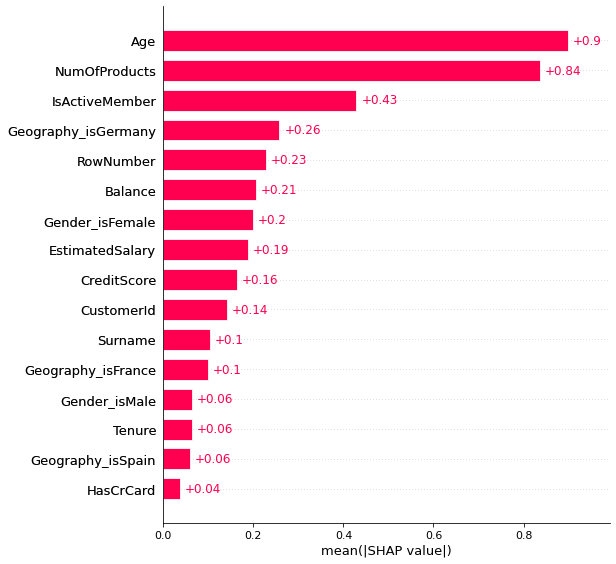

In [192]:
shap.plots.bar(shap_values.abs.mean(0), max_display=20)

Note que os impactos não estão em escala de probabilidade, eles estão na escala de <b> log(odds) </b>. 

## Feature importance

O modelo XGBoost também calcula automaticamente as variáveis importantes. Podemos usar esse score para entender quais variáveis precisamos focar e quais podemos tentar eliminar:

In [193]:
var_imp = pd.DataFrame(zip(features, modelo.feature_importances_), columns=['feature', 'importancia']).sort_values(by='importancia', ascending=False)

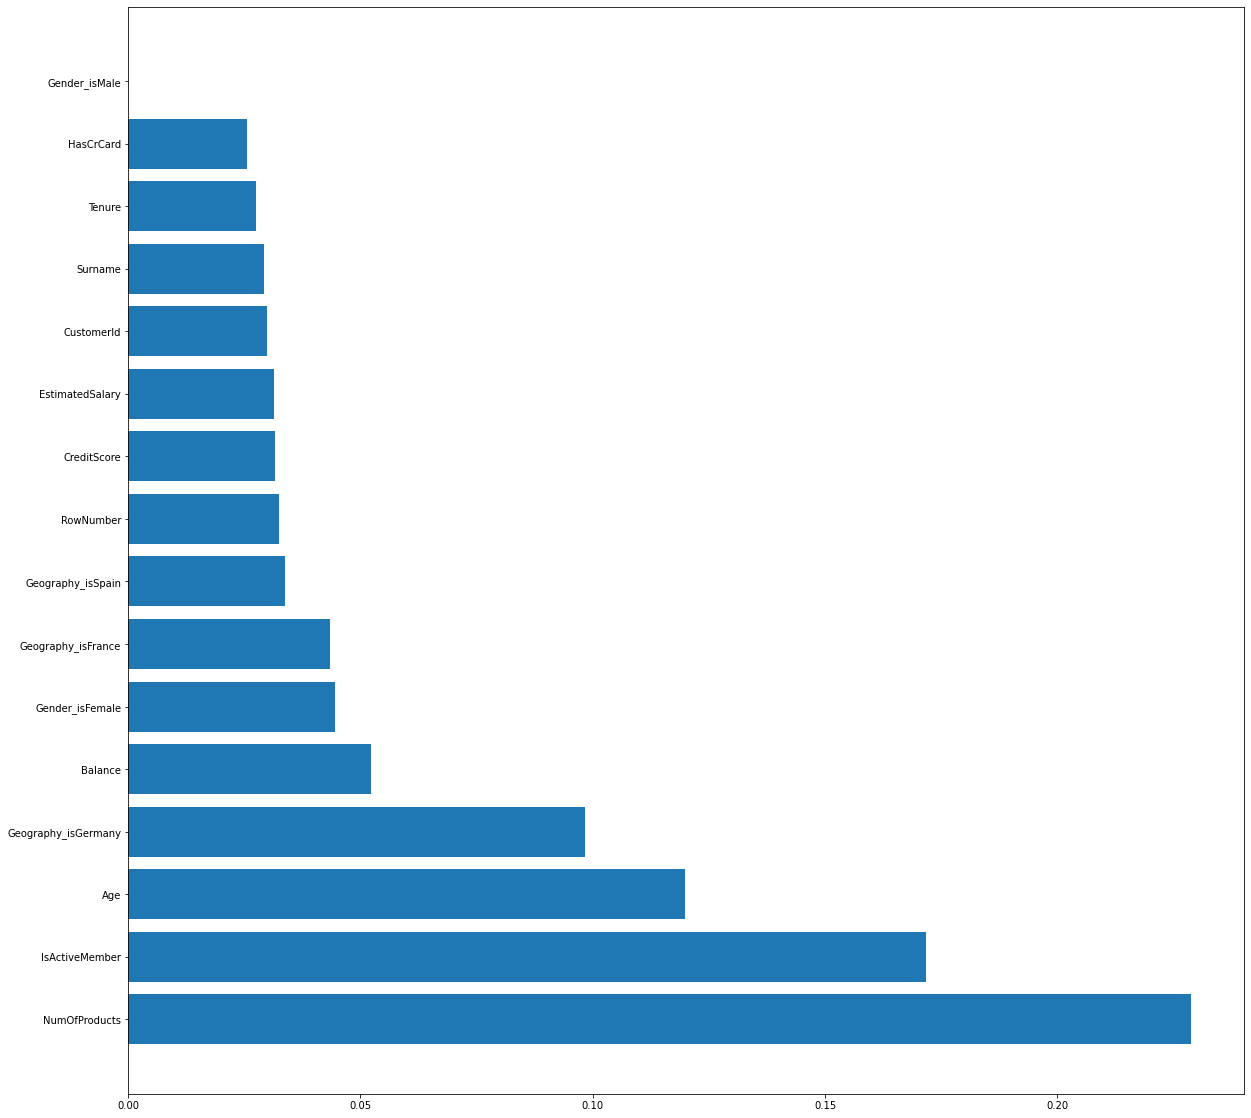

In [194]:
fig, ax = plt.subplots(figsize=(20,20))
ax = ax.barh(var_imp['feature'],var_imp['importancia'])

A partir daqui, podemos trabalhar no refinamento do modelo, eliminando variáveis que não auxiliam na predição e fazendo nova validação cruzada do modelo, de forma iterativa, até atingir um bom resultado.

In [233]:
threshold = 0.040
var_imp.loc[var_imp['importancia'] < threshold]

,feature,importancia
13,Geography_isSpain,0.033762
0,RowNumber,0.032452
3,CreditScore,0.031503
10,EstimatedSalary,0.031381
1,CustomerId,0.029807
2,Surname,0.029193
5,Tenure,0.027592
8,HasCrCard,0.025630
15,Gender_isMale,0.000000


In [234]:
variaveis_para_excluir = var_imp.loc[var_imp['importancia'] < threshold, 'feature'].tolist()

In [235]:
features_novas = [x for x in features if x not in variaveis_para_excluir]

In [236]:
features_novas

['Age',
 'Balance',
 'NumOfProducts',
 'IsActiveMember',
 'Geography_isFrance',
 'Geography_isGermany',
 'Gender_isFemale']

In [245]:
params = {'subsample': 0.9,
 'scale_pos_weight': 4,
 'max_depth': 4,
 'learning_rate': 0.15000000000000002,
 'colsample_bytree': 0.8}

In [246]:
clf = XGBClassifier(**params)

In [247]:
clf.fit(X=train[features_novas], y=train[output])

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[21:16:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.15000000000000002, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=4, subsample=0.9,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [248]:
validation['ypred'] = clf.predict(validation[features_novas])


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [249]:
print(classification_report(validation[output], validation['ypred']))

              precision    recall  f1-score   support

           0       0.93      0.81      0.87      1593
           1       0.51      0.76      0.61       407

    accuracy                           0.80      2000
   macro avg       0.72      0.79      0.74      2000
weighted avg       0.84      0.80      0.81      2000



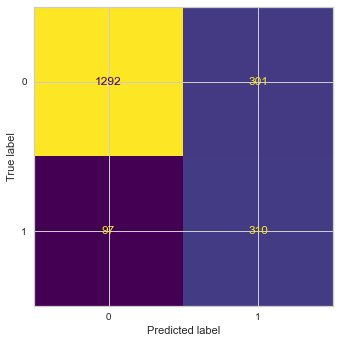

In [250]:
plot_confusion_matrix(clf, validation[features_novas], validation[output], colorbar=False)

In [251]:
nova_reducao_custo = score_custo_churn(y_true = validation[output], y_pred = validation['ypred'])
print(f"Baseado nas regras de negocio, o modelo_tunado tem potencial de redução de custo em: US${nova_reducao_custo}")

Baseado nas regras de negocio, o modelo_tunado tem potencial de redução de custo em: US$-469500


## Salvando o modelo

Vamos salvar o modelo e alguns artefatos para usar mais tarde. Isso pode ser feito utilizando o pickle

In [47]:
import os
from pathlib import Path

In [48]:
path = Path('../data/streamlit')

In [265]:
if not os.path.isdir(path):
    os.mkdir(path)

In [266]:
#salvando o modelo
with open(path/'classificador.pkl', 'wb') as file:
    pickle.dump(clf, file)

In [ ]:
#salvando uma lista de features

In [277]:
pd.Series(features_novas).to_csv(path/'features.txt', header=False, index=None)

In [49]:
#salvando dataset treinamento e validação já processado
train.to_pickle(path/'train.pkl')
validation.to_pickle(path/'validation.pkl')

## Outra opção para tratar classes desbalanceadas

- testamos o argumento scale_pos_weight para dar mais peso à classe minoritária. Poderiamos, ao contruir o dataset de treino, amostrar proporções iguais de churn = 0 e churn = 1

<AxesSubplot:>

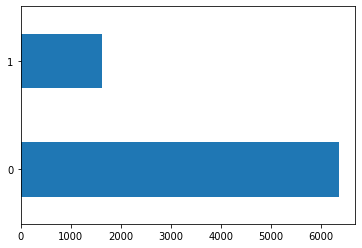

In [209]:
train[output].value_counts().plot.barh()

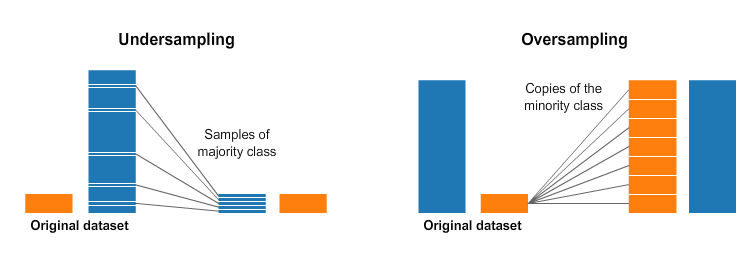

In [210]:
Image('../figures/under_over_sampling.png')

In [211]:
n_zeros, n_ones = train[output].value_counts()

In [212]:
print(f"Zeros = {n_zeros}, Uns: {n_ones}")

Zeros = 6370, Uns: 1630


In [213]:
train_zeros = train.loc[(train[output] == 0),:].sample(n=n_ones) #amostrando a mesma quantidade de 1s

In [214]:
train_zeros

,RowNumber,CustomerId,Surname,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_isFrance,Geography_isGermany,Geography_isSpain,Gender_isFemale,Gender_isMale
3455,3456,15580988,2006,842,29,8,0.00,2,1,1,123437.05,0,1,0,0,0,1
1147,1148,15671209,1192,593,29,5,101713.84,3,1,0,134594.99,0,0,1,0,1,0
7802,7803,15717962,442,773,63,9,111179.83,1,1,1,93091.02,0,0,0,1,0,1
6436,6437,15723216,1055,623,33,2,80002.33,1,1,1,104079.62,0,0,1,0,0,1
9815,9816,15745431,521,604,34,7,0.00,2,1,1,188078.55,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,295,15785819,2416,681,38,3,0.00,2,1,1,112491.96,0,1,0,0,0,1
4421,4422,15698758,2047,630,31,1,0.00,2,1,1,169802.73,0,0,0,1,1,0
3772,3773,15699486,1335,745,34,7,132944.53,1,1,1,31802.92,0,0,0,1,0,1
702,703,15603436,2376,594,49,2,126615.94,2,0,1,123214.74,0,0,0,1,1,0


In [215]:
train_ones = train.loc[(train[output] == 1),:]

In [216]:
train_ones

,RowNumber,CustomerId,Surname,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_isFrance,Geography_isGermany,Geography_isSpain,Gender_isFemale,Gender_isMale
2151,2152,15588614,2761,753,57,7,0.00,1,1,0,159475.08,1,1,0,0,0,1
8392,8393,15641158,211,739,32,3,102128.27,1,1,0,63981.37,1,0,1,0,0,1
8783,8784,15617052,2776,782,34,9,0.00,1,1,0,183021.06,1,1,0,0,0,1
4839,4840,15649150,355,531,53,5,127642.44,1,1,0,141501.45,1,1,0,0,1,0
5936,5937,15773723,765,588,22,9,67178.19,1,1,1,163534.75,1,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8007,8008,15791513,1668,647,41,4,138937.35,1,1,1,101617.64,1,1,0,0,0,1
6821,6822,15704209,1957,802,39,7,120145.96,2,0,1,59497.01,1,1,0,0,1,0
127,128,15782688,2168,625,56,0,148507.24,1,1,0,46824.08,1,0,1,0,0,1
487,488,15613772,663,542,39,3,135096.77,1,1,1,14353.43,1,1,0,0,0,1


In [217]:
train_balanced = pd.concat([train_zeros, train_ones])

<AxesSubplot:>

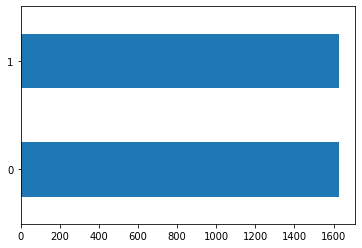

In [218]:
train_balanced[output].value_counts().plot.barh()

 Undersampling pode acarretar na perda de observações importante para o modelo, oversampling criará observações sintéticas que não ocorrem na mesma proporção "natural" do fenômeno. Dessa forma, sugere-se testar as metodologias de reamostragem, parametrização de modelos e threshold para entender qual irá funcionar para o problema em questão.

# Indo além

## Efeito do Threshold de classificação

Falamos sobre escolher os melhores hiperparâmetros de um modelo, técnicas para tratar classes não balanceadas, mas não falamos sobre o efeito do Threshold no desempenho do modelo. Pelo sklearn, as probabilidades são convertidas em classe 0 ou 1 utilizando um Threshold padrão de 0.5. Ou seja, valores com probabilidade > 50% são classe 1

Quanto temos classes desbalanceadas, otimizar esse threshold pode ser útil:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[21:11:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[21:11:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[21:11:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[21:11:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[21:11:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[21:11:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[21:11:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[21:11:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[21:11:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[21:11:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[21:11:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[21:11:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[21:11:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[21:11:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[21:11:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[21:11:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[21:11:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[21:11:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[21:11:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[21:11:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[21:11:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[21:11:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[21:12:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[21:12:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[21:12:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[21:12:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[21:12:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[21:12:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[21:12:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[21:12:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[21:12:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[21:12:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[21:12:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[21:12:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[21:12:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[21:12:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[21:12:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[21:12:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[21:12:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[21:12:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[21:12:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[21:12:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[21:12:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[21:12:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[21:12:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[21:12:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[21:12:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[21:12:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[21:12:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[21:12:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


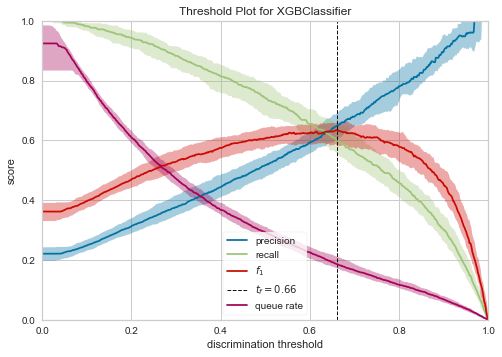

<AxesSubplot:title={'center':'Threshold Plot for XGBClassifier'}, xlabel='discrimination threshold', ylabel='score'>

In [219]:
from yellowbrick.classifier import DiscriminationThreshold
visualizer = DiscriminationThreshold(clf)

visualizer.fit(train[features_novas], train[output])        # Fit the data to the visualizer
visualizer.show()      

Para saber mais:
- https://www.scikit-yb.org/en/latest/api/classifier/threshold.html?highlight=threshold
- https://machinelearningmastery.com/threshold-moving-for-imbalanced-classification/